## Final Project Submission

Please fill out:
* Student name: 

* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


# Movie Industry EDA For Microsoft Studio

## Objective: Investigate the film industry to gain sufficient understanding of what attributes to success and in turn utilize this analysis to create actionable recommendations for industry entry.

Importing the necessary modules

In [1]:
# Your code here - remember to use markdown cells for comments as well!
import csv
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3
import seaborn as sns
import numpy as np 

Connect to the database

In [2]:
conn = sqlite3.connect('zippedData/im.db')
#cur=conn.cursor()

Converting CSV to datframe

In [3]:
df_movie_gross=pd.read_csv("zippedData/bom.movie_gross.csv")
df_movie_info = pd.read_csv("zippedData/rt.movie_info.tsv", sep='\t')
df_reviews = pd.read_csv("zippedData/rt.reviews.tsv", sep='\t', encoding='latin1')
df_movie_budgets =pd.read_csv("zippedData/tn.movie_budgets.csv")
df_tmdb_movies=pd.read_csv("zippedData/tmdb.movies.csv")

In [4]:
df_movie_gross

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


In [5]:
df_movie_info.head() 

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


In [6]:
df_movie_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [7]:
df_tmdb_movies.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


Database

In [8]:
Movie_ratings_db=pd.read_sql("""
SELECT * 
FROM movie_ratings;
""", conn)
Movie_ratings_db

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
...,...,...,...
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5


In [9]:
movie_basics_db=pd.read_sql("""
SELECT * 
FROM movie_basics;
""", conn)
movie_basics_db

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None


DATA CLEANING-Movie_budgets-Checking For Nan values

In [10]:
df_movie_budgets.isna().sum()

id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

Movie_budgets-Checking For Duplicates

In [11]:
df_movie_budgets.describe()
df_movie_budgets.duplicated().value_counts()

False    5782
dtype: int64

Removing Dollar sign

In [12]:
df_movie_budgets['production_budget'] = pd.to_numeric(df_movie_budgets['production_budget'].astype(str).str.replace('$','').str.replace(',',''))
df_movie_budgets['domestic_gross'] = pd.to_numeric(df_movie_budgets['domestic_gross'].astype(str).str.replace('$','').str.replace(',',''))
df_movie_budgets['worldwide_gross'] = pd.to_numeric(df_movie_budgets['worldwide_gross'].astype(str).str.replace('$','').str.replace(',',''))
df_movie_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747


In [18]:
# Calculate profit
df_movie_budgets['profit'] = df_movie_budgets['worldwide_gross'] - df_movie_budgets['production_budget']
# Calculate profit margin
df_movie_budgets['profit_margin'] = (df_movie_budgets['profit'] / df_movie_budgets['worldwide_gross']) * 100

# Calculate ROI (Return on Investment)
df_movie_budgets['ROI'] = (df_movie_budgets['profit'] / df_movie_budgets['production_budget']) * 100

# Display the DataFrame with the new 'ROI' column
df_movie_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit,profit_margin,ROI
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2351345279,84.692106,553.257713
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,635063875,60.733080,154.667286
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,-200237650,-133.703598,-57.210757
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,1072413963,76.436443,324.384139
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,999721747,75.925058,315.369636


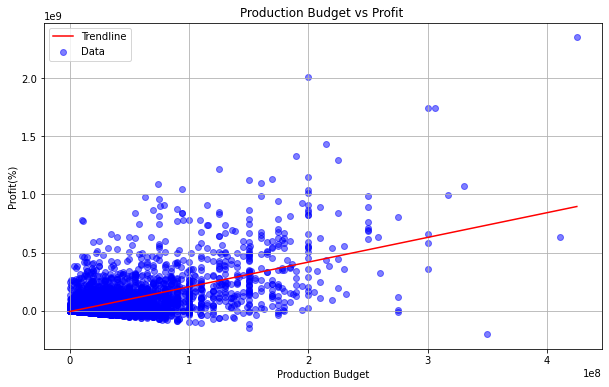

In [14]:
# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df_movie_budgets['production_budget'], df_movie_budgets['profit'], color='blue', alpha=0.5, label='Data')

# Fit a linear regression line
coefficients = np.polyfit(df_movie_budgets['production_budget'], df_movie_budgets['profit'], 1)
trendline_x = np.array([min(df_movie_budgets['production_budget']), max(df_movie_budgets['production_budget'])])
trendline_y = np.polyval(coefficients, trendline_x)
plt.plot(trendline_x, trendline_y, color='red', label='Trendline')

# Title and labels
plt.title('Production Budget vs Profit ')
plt.xlabel('Production Budget')
plt.ylabel('Profit(%)')

# Show legend
plt.legend()

# Show grid
plt.grid(True)

# Show plot
plt.show()

This scatter plot is helpful in beginning to understand how much money should be budgeted for a movie. The positive trend line indicates that an increase in the budget will result in an increase in profit.

In [15]:
profitable_movies_df = df_movie_budgets.loc[df_movie_budgets['profit'] > 0]
profitable_ranked_df = profitable_movies_df.sort_values(by=['profit'], ascending=False)
profitable_ranked_df.reset_index(inplace=True)
profitable_ranked_df.head()

,index,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit,profit_margin,ROI
0,0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2351345279,84.692106,553.257713
1,42,43,"Dec 19, 1997",Titanic,200000000,659363944,2208208395,2008208395,90.942884,1004.104198
2,6,7,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,1748134200,85.352522,582.711400
3,5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220,1747311220,85.097242,571.016739
4,33,34,"Jun 12, 2015",Jurassic World,215000000,652270625,1648854864,1433854864,86.960647,666.909239


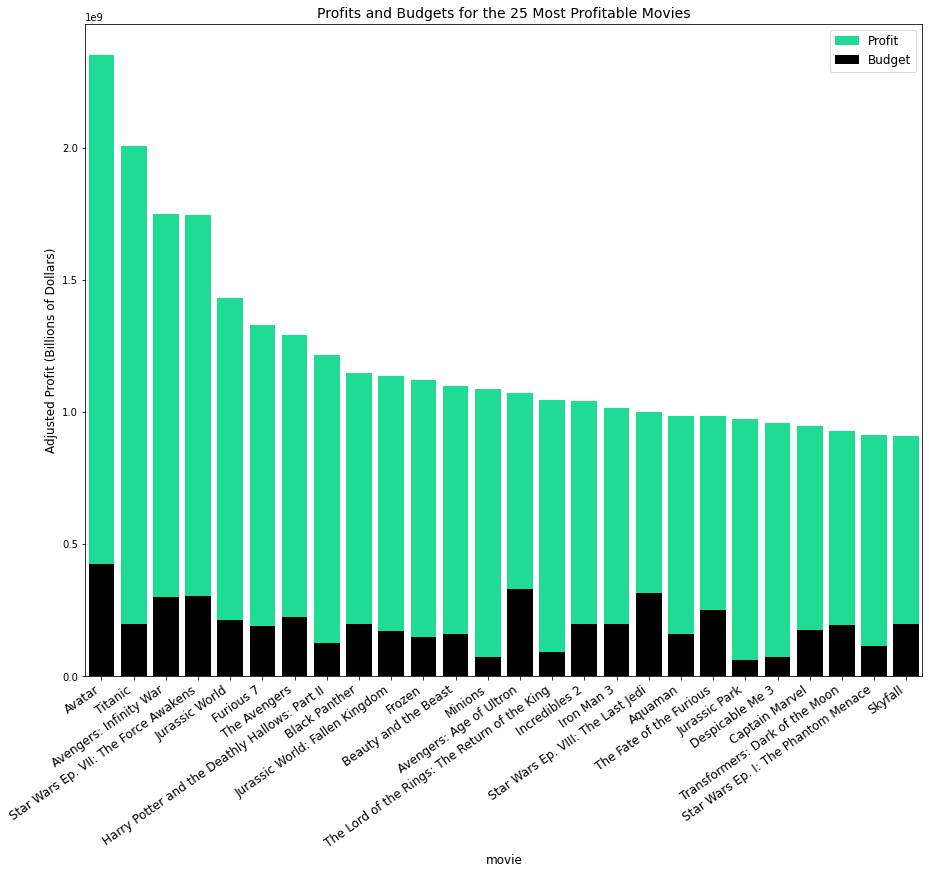

In [16]:
plt.figure(figsize=(15,12))
sns.barplot(x=profitable_ranked_df.loc[0:25, 'movie'],y=profitable_ranked_df.loc[0:25, 'profit'], 
            color='mediumspringgreen', label='Profit', ci=None)
sns.barplot(x=profitable_ranked_df.loc[0:25, 'movie'],y=profitable_ranked_df.loc[0:25, 'production_budget'], 
            color='black', label='Budget', ci=None)
plt.xlabel('movie', fontsize=12)
plt.title("Profits and Budgets for the 25 Most Profitable Movies", fontsize=14)
plt.ylabel('Adjusted Profit (Billions of Dollars)', fontsize=12)
plt.xticks(rotation=35, horizontalalignment='right', fontsize=12)
plt.legend(fontsize=12)
plt.savefig('ProfitBudgetTop25');

Clearly the most successful 25 movies have both incredible profits and profit margins. Titanic (1997), Avatar, and Avengers: Endgame are the most successful movies in terms of sheer profit.

In [19]:
df_movie_budgets['profit'].describe()

count    5.782000e+03
mean     5.989970e+07
std      1.460889e+08
min     -2.002376e+08
25%     -2.189071e+06
50%      8.550286e+06
75%      6.096850e+07
max      2.351345e+09
Name: profit, dtype: float64

In [20]:
df_movie_budgets.loc[0:24, 'production_budget'].describe()

count    2.500000e+01
mean     2.867680e+08
std      5.005396e+07
min      2.300000e+08
25%      2.500000e+08
50%      2.750000e+08
75%      3.000000e+08
max      4.250000e+08
Name: production_budget, dtype: float64

In [23]:
df_movie_budgets['profit_margin'].describe()

count    5782.000000
mean            -inf
std              NaN
min             -inf
25%      -103.130096
50%        41.462600
75%        73.392547
max        99.944444
Name: profit_margin, dtype: float64

In [24]:
df_movie_budgets.loc[0:24, 'profit_margin'].describe()

count     25.000000
mean      55.443642
std       45.938852
min     -133.703598
25%       55.667504
50%       71.181566
75%       75.925058
max       85.352522
Name: profit_margin, dtype: float64

In [25]:
len(profitable_ranked_df.loc[profitable_ranked_df['profit_margin'] > 0.5])

3646